# Linear Regression 

### training

In [215]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [216]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3)

In [217]:
model = LinearRegression().fit(x_train,y_train)
r_sqr = model.score(x_train,y_train)
r_sqr

0.9644879445435123

In [218]:
c = model.predict(x_train)
c.shape

(20,)

In [219]:
print('coefficient of determination:', r_sqr)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9644879445435123
intercept: 24752.823595477246
slope: [9636.86222301]


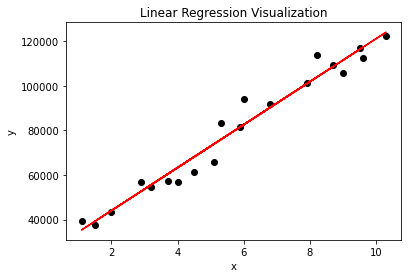

In [220]:
plt.scatter(x_train, y_train, color = "black")
plt.plot(x_train, model.predict(x_train), color = "red")
plt.title("Linear Regression Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### test

In [221]:
model.predict(x_test)

array([ 45953.92048609,  64263.95870981,  62336.58626521,  53663.4102645 ,
        63300.27248751, 125939.87693706,  55590.7827091 ,  71973.44848821,
        37280.74448539,  93174.54537883])

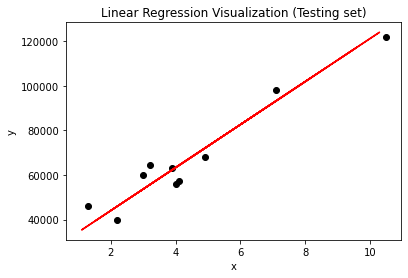

In [222]:
plt.scatter(x_test, y_test, color = "black")
plt.plot(x_train, model.predict(x_train), color = "red")
plt.title("Linear Regression Visualization (Testing set)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Logistic Regression

Predicting whether user is going to buy a product displayed on a social networking site by clicking the ad on the site

### training

In [261]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [262]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [263]:
df.corr()

User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000

In [264]:
df.drop('User ID', axis=1,inplace=True)
label = {'Male': 0, 'Female':1}
df['Gender'].replace(label, inplace=True)
df.head()

Gender  Age  EstimatedSalary  Purchased
0       0   19            19000          0
1       0   35            20000          0
2       1   26            43000          0
3       1   27            57000          0
4       0   19            76000          0

In [265]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Purchased',axis=1)
y = df['Purchased']

scaler = StandardScaler()
scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(scaled)
df_scaled.head()

0         1         2
0 -1.020204 -1.781797 -1.490046
1 -1.020204 -0.253587 -1.460681
2  0.980196 -1.113206 -0.785290
3  0.980196 -1.017692 -0.374182
4 -1.020204 -1.781797  0.183751

In [266]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train,y_test = train_test_split(df_scaled,y,test_size=0.3,random_state=42)

model = LogisticRegression(C=2, max_iter=400).fit(x_train,y_train)

### test

In [269]:
y_pred = model.predict(x_test)
print("training accuracy:", + model.score(x_train,y_train))
print("test accuracy:", + model.score(x_test,y_test))

training accuracy: 0.8214285714285714
test accuracy: 0.8583333333333333


In [285]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
matrix = pd.DataFrame(confusion_matrix(y_test,y_pred), columns= [ 'Predicted Negative', 'Predicted Positive'], index= ['Negative', 'Positive'])
matrix

Predicted Negative  Predicted Positive
Negative                  71                   2
Positive                  15                  32

In [288]:
precision = matrix['Predicted Positive'][1] / (matrix['Predicted Positive'][1] + matrix['Predicted Positive'][0])
recall = matrix['Predicted Positive'][1] / (matrix['Predicted Positive'][1] + matrix['Predicted Negative'][1])

print('recall:', + recall)
print('precision:', + precision)

recall: 0.6808510638297872
precision: 0.9411764705882353
